# Telco Customer Dataset - Churn predcition using Decison Tree

In [1]:
# install.packages("ggplot2")
# install.packages("dplyr")
# install.packages("rpart")
# install.packages("rattle")
# install.packages("rpart.plot")
# install.packages("RColorBrewer")
# install.packages("party")
# install.packages("partykit")
# install.packages("caret")
# install.packages("heuristica")

In [2]:
library(ggplot2)
library(dplyr)
library(rpart)
# library(dummies)
# library(rattle)
library(rpart.plot)
library(heuristica)
# library(RColorBrewer)
# library(party)
# library(partykit)
# library(caret)

Warning message:
“package ‘dplyr’ was built under R version 3.4.2”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘rpart’ was built under R version 3.4.3”

## Reading dataset

In [3]:
data.set = read.csv(file="Datasets/Teleco_Cust_Attr.csv",header = T)
str(data.set)
summary(data.set)
prop.table(table(data.set$Churn))

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

      customerID      gender     SeniorCitizen    Partner    Dependents
 0002-ORFBO:   1   Female:3488   Min.   :0.0000   No :3641   No :4933  
 0003-MKNFE:   1   Male  :3555   1st Qu.:0.0000   Yes:3402   Yes:2110  
 0004-TLHLJ:   1                 Median :0.0000                        
 0011-IGKFF:   1                 Mean   :0.1621                        
 0013-EXCHZ:   1                 3rd Qu.:0.0000                        
 0013-MHZWF:   1                 Max.   :1.0000                        
 (Other)   :7037                                                       
     tenure      PhoneService          MultipleLines     InternetService
 Min.   : 0.00   No : 682     No              :3390   DSL        :2421  
 1st Qu.: 9.00   Yes:6361     No phone service: 682   Fiber optic:3096  
 Median :29.00                Yes             :2971   No         :1526  
 Mean   :32.37                                                          
 3rd Qu.:55.00                                             


       No       Yes 
0.7346301 0.2653699 

## Data preprocessing

In [4]:
data.set$customerID = NULL
sapply(data.set,function(x){sum(is.na(x))})

gender    SeniorCitizen          Partner       Dependents 
               0                0                0                0 
          tenure     PhoneService    MultipleLines  InternetService 
               0                0                0                0 
  OnlineSecurity     OnlineBackup DeviceProtection      TechSupport 
               0                0                0                0 
     StreamingTV  StreamingMovies         Contract PaperlessBilling 
               0                0                0                0 
   PaymentMethod   MonthlyCharges     TotalCharges            Churn 
               0                0               11                0

### Handling nulls

In [5]:
data.set$TotalCharges = ifelse(is.na(data.set$TotalCharges),data.set$MonthlyCharges*data.set$tenure,data.set$TotalCharges)

In [6]:
unique(data.set$SeniorCitizen)
data.set$SeniorCitizen = as.factor(data.set$SeniorCitizen)

[1] 0 1

In [7]:
str(data.set)

'data.frame':	7043 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","No internet service",..: 1 3 1 3 1 3 1 1 3 1 ...
 $ TechSupport     : Factor w/ 3 levels "No","No intern

## Test Train Split

In [8]:
set.seed(987)
sample = sample(1:nrow(data.set),size=.7*nrow(data.set))
train.data.set = data.set[sample,]
test.data.set = data.set[-sample,]
nrow(data.set)
nrow(train.data.set)
nrow(test.data.set)

[1] 7043

[1] 4930

[1] 2113

## Decision Tree

In [9]:
dec.tree.1 = rpart( Churn ~ . , data=train.data.set,  method = "class")
summary(dec.tree.1)
dec.tree.1$variable.importance

Call:
rpart(formula = Churn ~ ., data = train.data.set, method = "class")
  n= 4930 

          CP nsplit rel error    xerror       xstd
1 0.06966692      0 1.0000000 1.0000000 0.02366298
2 0.01220442      3 0.7909992 0.8047292 0.02196524
3 0.01000000      5 0.7665904 0.8039664 0.02195766

Variable importance
        Contract           tenure     TotalCharges   OnlineSecurity 
              20               17               14               10 
     TechSupport DeviceProtection   MonthlyCharges  InternetService 
               9                8                7                7 
    OnlineBackup    MultipleLines      StreamingTV          Partner 
               4                3                1                1 

Node number 1: 4930 observations,    complexity param=0.06966692
  predicted class=No   expected loss=0.2659229  P(node) =1
    class counts:  3619  1311
   probabilities: 0.734 0.266 
  left son=2 (2221 obs) right son=3 (2709 obs)
  Primary splits:
      Contract       spl

Contract           tenure     TotalCharges   OnlineSecurity 
      305.289609       260.391456       211.067385       145.272831 
     TechSupport DeviceProtection   MonthlyCharges  InternetService 
      134.638676       114.700179       102.054908       101.047181 
    OnlineBackup    MultipleLines      StreamingTV          Partner 
       53.317935        45.097536        14.632266        14.242747 
   PaymentMethod 
        3.141035

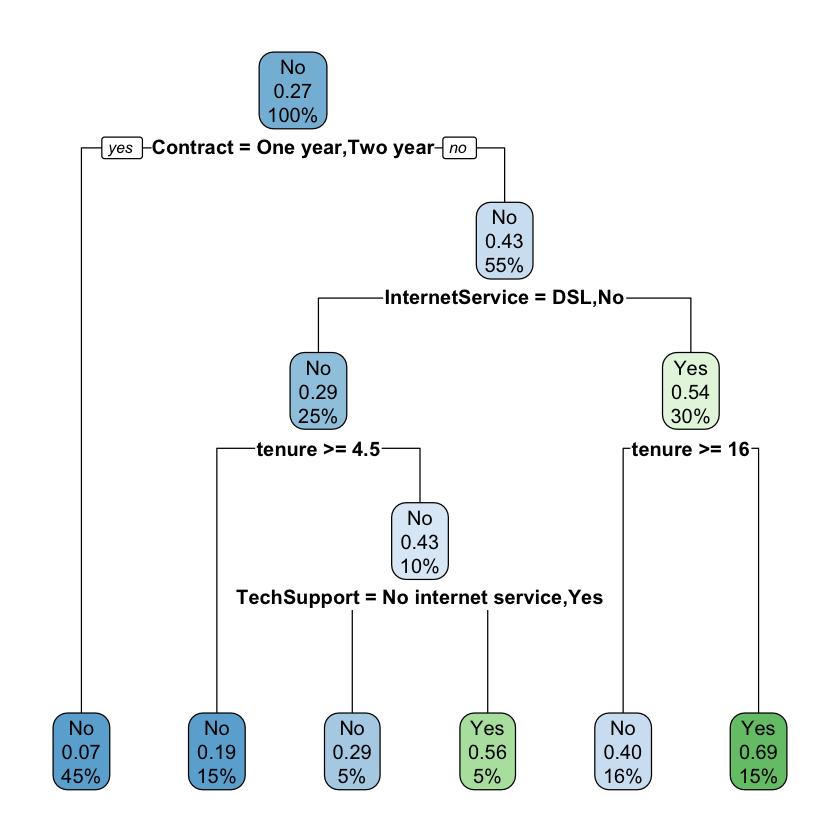

In [10]:
rpart.plot(dec.tree.1)
# ?rpart

In [14]:
## Predictions
pred.train.data.set = as.data.frame(train.data.set$Churn)
colnames(pred.train.data.set)[1] = "Churn"
pred.train.data.set$Churn.pred = predict(dec.tree.1,newdata = train.data.set,type="class")
head(pred.train.data.set)
table(pred.train.data.set$Churn)

Churn,Churn.pred
No,No
No,No
Yes,No
Yes,Yes
No,No
No,No



  No  Yes 
3619 1311 

In [15]:
table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)
tr.TN = table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)[1]
tr.FP = table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)[3]
tr.FN = table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)[2]
tr.TP = table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)[4]

tr.TN
tr.FP
tr.FN
tr.TP

tr.Accuray = (tr.TN+tr.TP)/(tr.TN+tr.TP+tr.FN+tr.FP)
tr.Precision = (tr.TP)/(tr.TP+tr.FP)
tr.Recall = (tr.TP)/(tr.TP+tr.FN)
tr.F1 = 2*tr.Precision*tr.Recall/(tr.Precision+tr.Recall)

tr.Accuray
tr.Precision
tr.Recall
tr.F1

     
        No  Yes
  No  3284  335
  Yes  670  641

[1] 3284

[1] 335

[1] 670

[1] 641

[1] 0.796146

[1] 0.6567623

[1] 0.4889397

[1] 0.5605597

In [16]:
## Predictions
pred.test.data.set = as.data.frame(test.data.set$Churn)
colnames(pred.test.data.set)[1] = "Churn"
pred.test.data.set$Churn.pred = predict(dec.tree.1,newdata = test.data.set,type="class")
# head(pred.test.data.set)
table(pred.test.data.set$Churn)
nrow(pred.test.data.set)


  No  Yes 
1555  558 

[1] 2113

In [17]:
table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)
tt.TN = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[1]
tt.FP = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[3]
tt.FN = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[2]
tt.TP = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[4]

tt.Precision = (tt.TP)/(tt.TP+tt.FP)
tt.Accuray = (tt.TN+tt.TP)/(tt.TN+tt.TP+tt.FN+tt.FP)
tt.Recall = (tt.TP)/(tt.TP+tt.FN)
tt.F1 = 2*tt.Precision*tt.Recall/(tt.Precision+tt.Recall)

tt.Accuray
tt.Precision
tt.Recall
tt.F1

     
        No  Yes
  No  1413  142
  Yes  290  268

[1] 0.7955513

[1] 0.6536585

[1] 0.4802867

[1] 0.553719